In [1]:
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
consumerKey = 'XXXXXXXXXXXX' 
consumerSecret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
accessToken = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
accesTokenSecret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [4]:
##create the authentication object

In [5]:
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken, accesTokenSecret)
api=tweepy.API(auth)

In [7]:
posts = api.user_timeline(screen_name = 'SundarPichai', count = 100, lang = 'en', tweet_mode = 'extended')

In [8]:
print("Five recent tweets")
i=1
for tweet in posts[0:5]:
    #print (tweet.full_text + '\n')
    print(str(i) + ' ' + tweet.full_text+'\n')
    i = i+1

Five recent tweets
1 @DavidMalpassWBG Thanks @DavidMalpassWBG @WorldBank for an engaging conversation on addressing the barriers to digital connectivity in emerging countries. Proud to partner with you to help bring the benefits of technology to more people around the world.

2 22 years in, we’re still focused on providing the most helpful Google Search experience powered by #GoogleAI - whether it’s giving better answers, finding key moments in videos, bringing useful information to AR in Maps, hum to search + more. #SearchOn 

https://t.co/f46ojjbyWg

3 We're introducing Journalist Studio, a suite of tools to help reporters do their work more efficiently, including using #GoogleAI to help quickly sift through huge amounts of files, and a new way to explore and visualize data 
https://t.co/fG6fWvn7kO

4 Such a nice moment, congrats to Paul Milgrom and Robert Wilson for their Nobel Prize! https://t.co/HeqffRWo5a

5 Congrats to the 76 founders who will be receiving awards from the $5M @G

In [9]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [10]:
df.head()

,Tweets
0,@DavidMalpassWBG Thanks @DavidMalpassWBG @Worl...
1,"22 years in, we’re still focused on providing ..."
2,"We're introducing Journalist Studio, a suite o..."
3,"Such a nice moment, congrats to Paul Milgrom a..."
4,Congrats to the 76 founders who will be receiv...


In [11]:
#clean the data

In [12]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/S+', '', text)  
    return text

In [13]:
df['Tweets']= df['Tweets'].apply(cleanText)

In [14]:
df.head()

,Tweets
0,Thanks for an engaging conversation on addr...
1,"22 years in, we’re still focused on providing ..."
2,"We're introducing Journalist Studio, a suite o..."
3,"Such a nice moment, congrats to Paul Milgrom a..."
4,Congrats to the 76 founders who will be receiv...


In [15]:
#Subjectivity & Creativity

In [16]:
def getSubjectivty(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
df['Subjectivity']= df['Tweets'].apply(getSubjectivty)
df['Polarity']= df['Tweets'].apply(getPolarity)


In [18]:
df

,Tweets,Subjectivity,Polarity
0,Thanks for an engaging conversation on addr...,0.480000,0.380000
1,"22 years in, we’re still focused on providing ...",0.500000,0.360000
2,"We're introducing Journalist Studio, a suite o...",0.588636,0.342424
3,"Such a nice moment, congrats to Paul Milgrom a...",0.750000,0.375000
4,Congrats to the 76 founders who will be receiv...,0.416667,0.211111
...,...,...,...
95,Today is pledging another $50M to COVID19 res...,0.650000,0.400000
96,DearClassof2020: looking forward to celebratin...,0.000000,0.000000
97,: We've been helping to facilitate the product...,0.000000,0.000000
98,: More grateful than ever for the teachers in ...,0.750000,0.650000


In [19]:
##plot the word cloud

In [20]:
allWords = ''.join([twts for twts in df['Tweets']])
wordcloud= WordCloud(width = 500, height = 300, random_state= 21, max_font_size=100).generate(allWords)

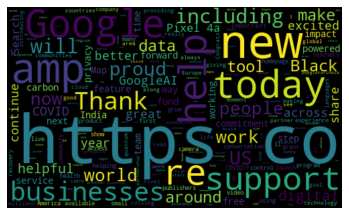

In [21]:
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [22]:
#Analyzing +ve, -ve & neutral

In [23]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [24]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [25]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Thanks for an engaging conversation on addr...,0.480000,0.380000,Positive
1,"22 years in, we’re still focused on providing ...",0.500000,0.360000,Positive
2,"We're introducing Journalist Studio, a suite o...",0.588636,0.342424,Positive
3,"Such a nice moment, congrats to Paul Milgrom a...",0.750000,0.375000,Positive
4,Congrats to the 76 founders who will be receiv...,0.416667,0.211111,Positive
...,...,...,...,...
95,Today is pledging another $50M to COVID19 res...,0.650000,0.400000,Positive
96,DearClassof2020: looking forward to celebratin...,0.000000,0.000000,Neutral
97,: We've been helping to facilitate the product...,0.000000,0.000000,Neutral
98,: More grateful than ever for the teachers in ...,0.750000,0.650000,Positive


In [26]:
##Positive tweets

In [27]:
j=1
sorted_tweets=df.sort_values(by=['Polarity'])
for i in range (0, sorted_tweets.shape[0]):
    if (sorted_tweets['Analysis'][i]== 'Positive'):
        print(str(j) + ') ' +sorted_tweets['Tweets'][i])
        print () 
        j=j+1

1)  Thanks   for an engaging conversation on addressing the barriers to digital connectivity in emerging countries. Proud to partner with you to help bring the benefits of technology to more people around the world.

2) 22 years in, we’re still focused on providing the most helpful Google Search experience powered by GoogleAI - whether it’s giving better answers, finding key moments in videos, bringing useful information to AR in Maps, hum to search + more. SearchOn 

https://t.co/f46ojjbyWg

3) We're introducing Journalist Studio, a suite of tools to help reporters do their work more efficiently, including using GoogleAI to help quickly sift through huge amounts of files, and a new way to explore and visualize data 
https://t.co/fG6fWvn7kO

4) Such a nice moment, congrats to Paul Milgrom and Robert Wilson for their Nobel Prize! https://t.co/HeqffRWo5a

5) Congrats to the 76 founders who will be receiving awards from the $5M  Black Founders Fund. Great to chat with some of them last we

In [28]:
## Negative tweets

In [29]:
j=1
sorted_tweets=df.sort_values(by=['Polarity'], ascending = 'False')
for i in range (0, sorted_tweets.shape[0]):
    if (sorted_tweets['Analysis'][i]== 'Negative'):
        print(str(j) + ') ' +sorted_tweets['Tweets'][i])
        print () 
        j=j+1

1) : As has been noticed, several Google services were down for some users from 6:00 to 6:23 p.m. PDT. A pool of servers that rout…

2) : To help slow the spread of COVID-19, we are reminding people of the steps they can take to protect themselves and each other. h…

3) : Starting today, our friends at  are matching donations to projects from Black and Latinx teachers, and projects…

4) Immigration has contributed immensely to America’s economic success, making it a global leader in tech, and also Google the company it is today. Disappointed by today’s proclamation - we’ll continue to stand with immigrants and work to expand opportunity for all.

5)  So sorry for your loss

6) : DearClassof2020 As  says it’s been a hard year, but you’re showing that your generation will turn outrage into act…

7) Today on US Google &amp; YouTube homepages we share our support for racial equality in solidarity with the Black community and in memory of George Floyd, Breonna Taylor, Ahmaud Arbery &amp; ot

In [30]:
##Plot the polarity & subjectivity

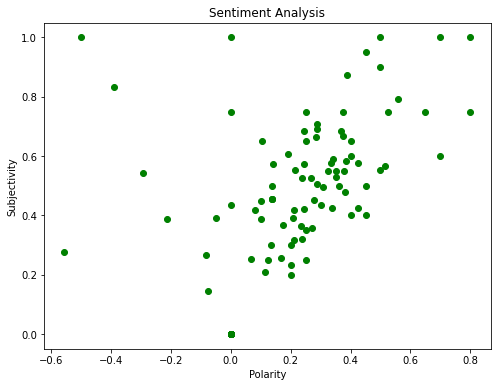

In [31]:
plt.figure(figsize = (8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
##Get the percentage of tweets
per_tweets = df[df.Analysis == 'Positive']
per_tweets = per_tweets['Tweets']
per_tweets
round(per_tweets.shape[0]/df.shape[0]*100, 1)

75.0

In [33]:
ne_tweets = df[df.Analysis == 'Negative']
ne_tweets = ne_tweets['Tweets']
round(ne_tweets.shape[0]/df.shape[0]*100, 1)

8.0

In [34]:
df['Analysis'].value_counts()

Positive    75
Neutral     17
Negative     8
Name: Analysis, dtype: int64

In [35]:
## Plot

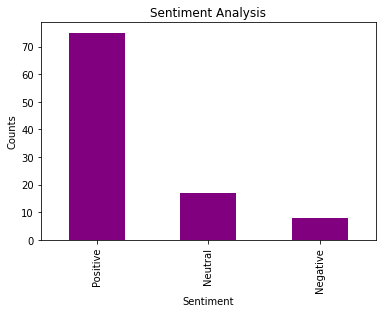

In [36]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar', color = 'Purple')
plt.show()